In [1]:
import pandas as pd
import numpy as np
from utils import *
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)})

In [2]:
PATH = "../dados/brutos/tweets_marco_class/"

In [3]:
marco_df = get_tweets_from_folder(PATH)

In [4]:
marco_df["date"] = pd.to_datetime(marco_df["date"])

In [5]:
tweets_by_day_df = get_tweets_by_day(marco_df, True)


In [6]:
tweets_by_day_df

,data,positivos,neutros,negativos,hashtags,total
0,2020-03-13,0.135952,0.360692,0.503357,"[#sobrevivencialismo, #preppers, #preparacao, ...",5958.0
1,2020-03-20,0.20157,0.401416,0.397014,"[#sextou, #bbb20, #cancelatudo, #quarentena, #...",84055.0
2,2020-03-27,0.186158,0.328647,0.485195,"[#twitter, #futurenostalgia, #quarentena, #ask...",48867.0


In [7]:
tweets_by_day_df.set_index("data", inplace=True)

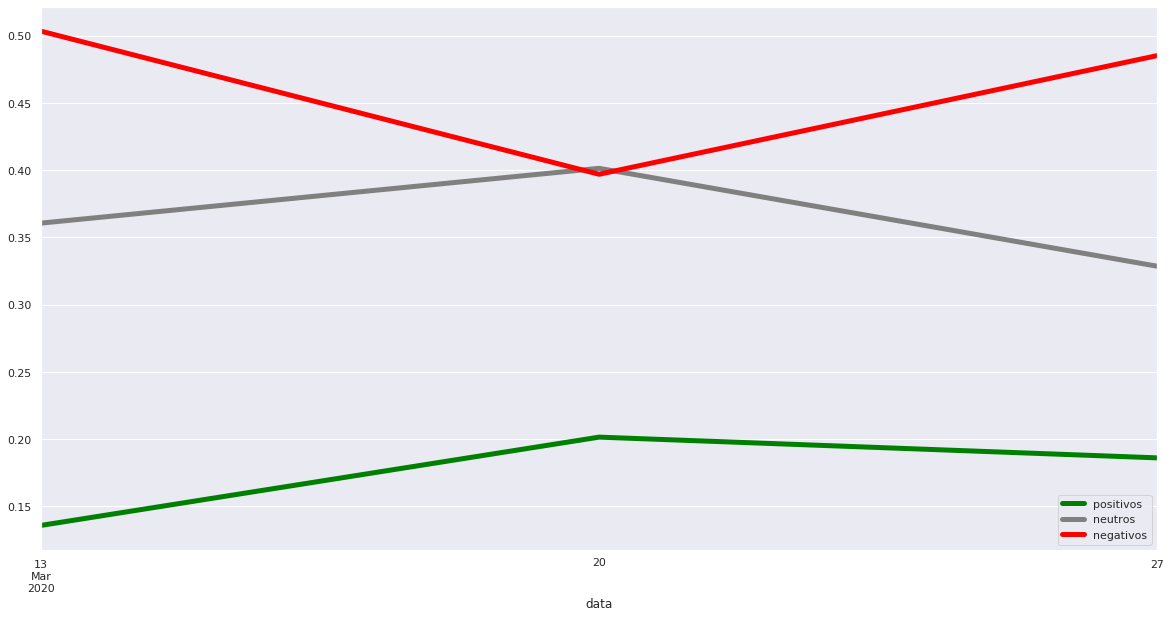

In [8]:
tweets_by_day_df.drop("total", axis=1).plot(linewidth=5, color=["green", "gray", "red"])

# Wordclouds por dia

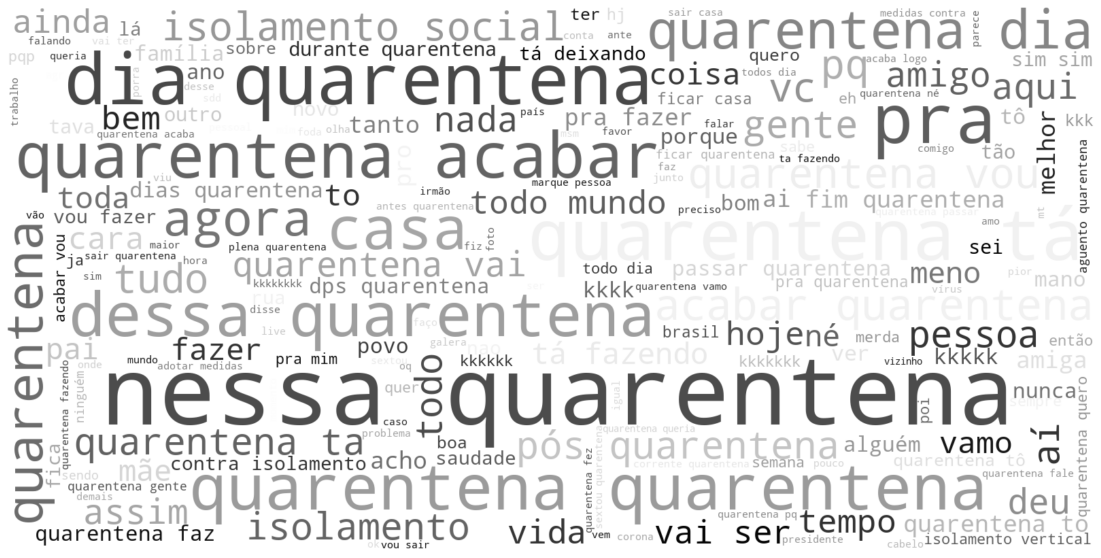

In [9]:
for day in tweets_by_day_df.index:
    day_df = marco_df[marco_df["date"] == day]
    build_wordcloud(day_df["tweet"].values.tolist(), output_file=str(day)+".png", save_file=True)


# Análise de hashtags por dia

In [10]:
tweets_by_day_df.index

DatetimeIndex(['2020-03-13', '2020-03-20', '2020-03-27'], dtype='datetime64[ns]', name='data', freq=None)

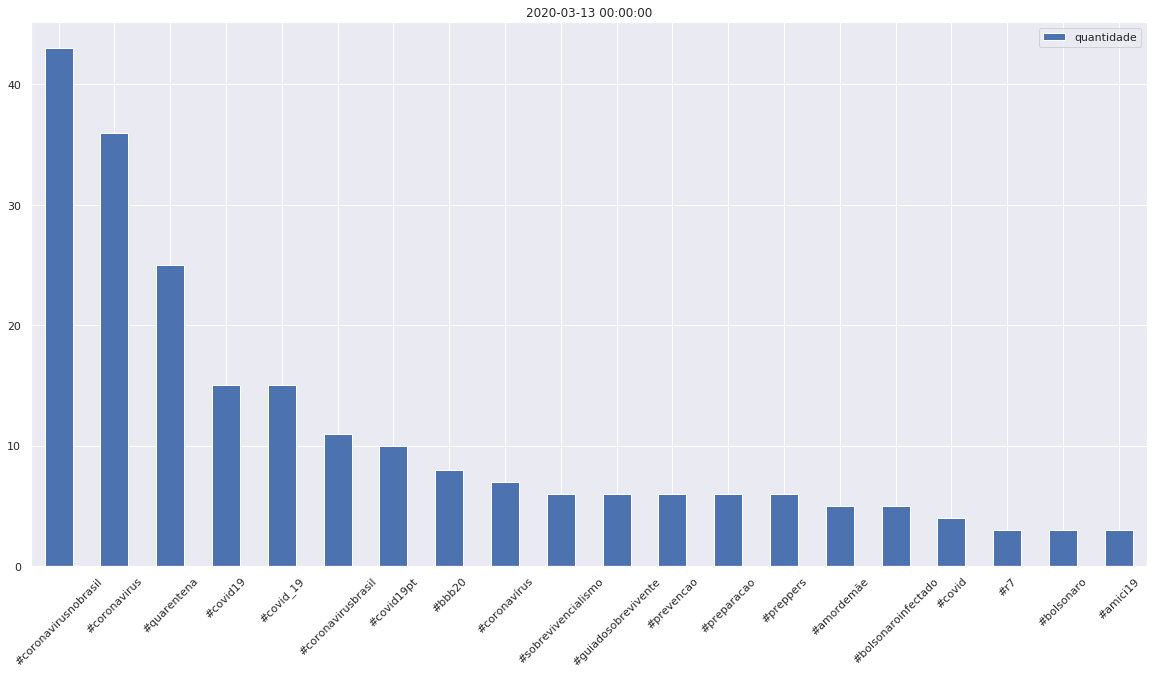

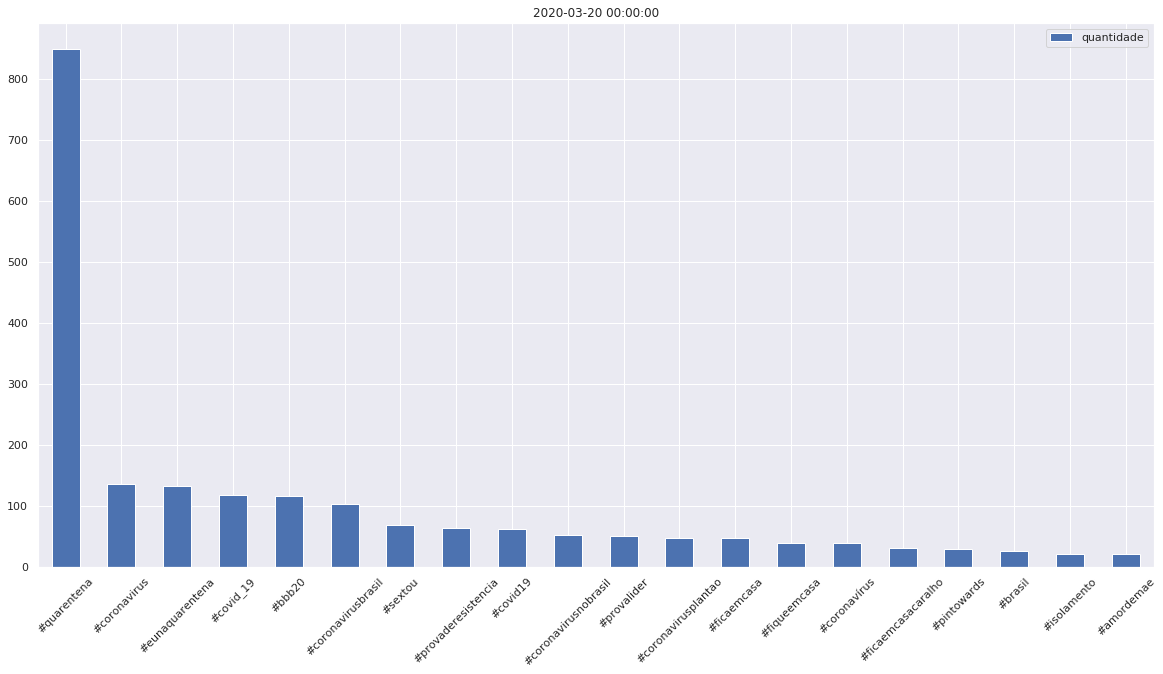

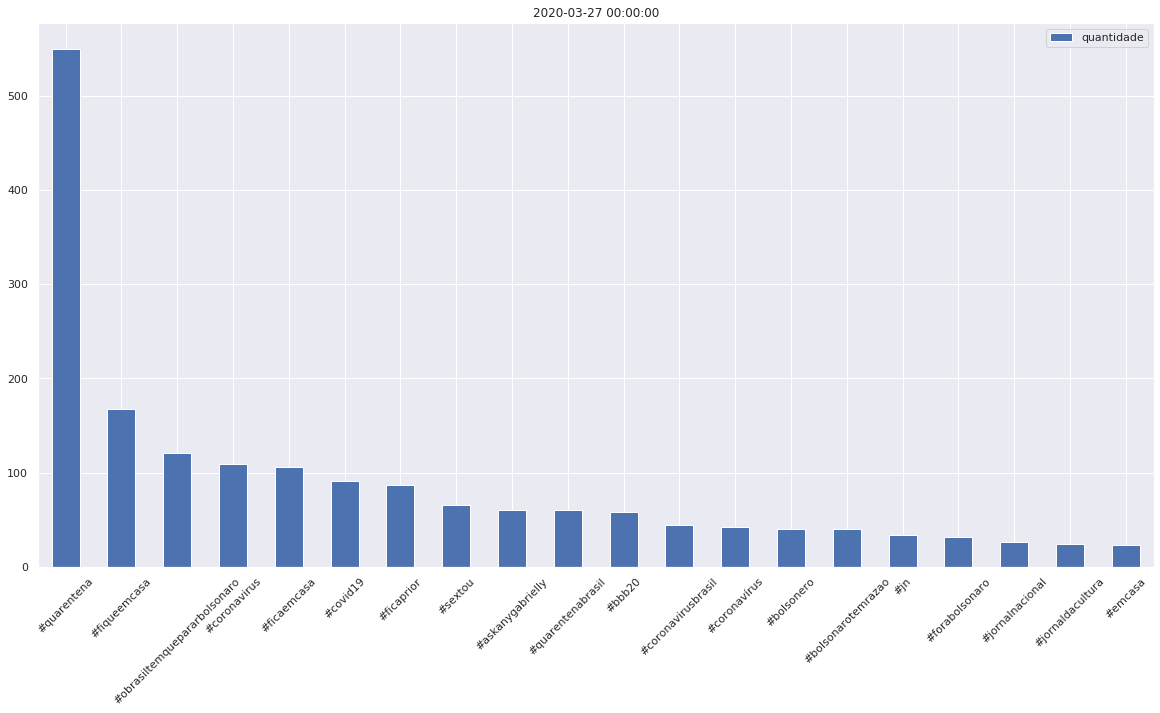

In [11]:
for day in tweets_by_day_df.index:
    hashtags = tweets_by_day_df.loc[day]["hashtags"]
    hashtags_df = contabilize_hashtags(hashtags)
    hashtags_df.head(20).plot.bar(rot=45, title=str(day))
